In [47]:
import pandas as pd

# Load the train dataset
train_df = pd.read_csv('train.csv')

# Display the first few rows to understand the structure
print(train_df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [49]:
# Check for missing values
missing_data = train_df.isnull().sum()

# Show missing data counts for each column
print(missing_data[missing_data > 0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [51]:
# Use one-hot encoding for categorical variables
train_encoded = pd.get_dummies(train_df, drop_first=True)

# Display the first few rows of the encoded dataset
print(train_encoded.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  SaleTyp

In [53]:
# Separate features (X) and target (y)
X = train_encoded.drop('SalePrice', axis=1)  # Features
y = train_encoded['SalePrice']  # Target variable

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(X_train.shape, X_test.shape)

(1168, 245) (292, 245)


In [57]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Impute numerical columns with the median
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_test[numerical_cols].median())

# Impute categorical columns with the mode or 'None' for columns with many missing values
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if X_train[col].isnull().sum() > len(X_train) / 2:
        X_train[col].fillna('None', inplace=True)
        X_test[col].fillna('None', inplace=True)
    else:
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)
        X_test[col].fillna(X_test[col].mode()[0], inplace=True)

# Verify if there are any missing values left
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum())


0 0


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

# 2. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Impute missing values (for ALL columns – they’re all numeric after get_dummies)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# (Optional) sanity check: make sure no NaNs remain
import numpy as np
print("Any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())
print("Any NaNs in X_test_scaled?", np.isnan(X_test_scaled).any())


Any NaNs in X_train_scaled? False
Any NaNs in X_test_scaled? False



Correlation Matrix:
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
Tota

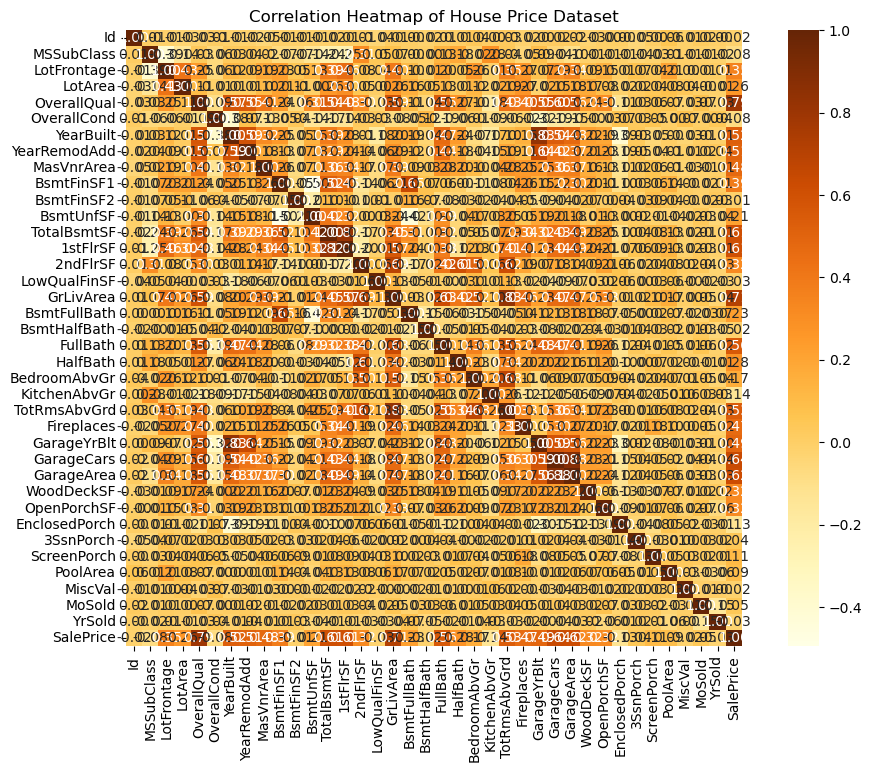

In [87]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix on numerical columns only
correlation_matrix = train_df[numerical_cols].corr()

# Display the correlation matrix in text form
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the heatmap with yellow color theme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlOrBr", square=True)
plt.title("Correlation Heatmap of House Price Dataset")
plt.show()


In [89]:
# Focus on the correlation with SalePrice
corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display the top 10 most correlated features with SalePrice
print(corr_saleprice.head(10))


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


C:\Users\Eileen Lok\AppData\Local\Temp\ipykernel_33248\490978384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_saleprice.head(10).index, y=corr_saleprice.head(10).values, palette="Blues_d")


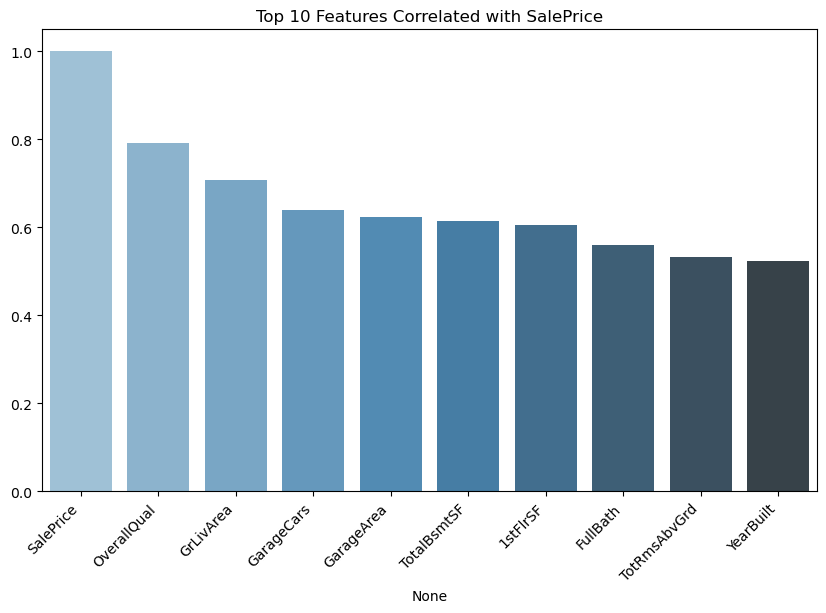

In [91]:
# Visualizing the top 10 features correlated with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_saleprice.head(10).index, y=corr_saleprice.head(10).values, palette="Blues_d")
plt.title("Top 10 Features Correlated with SalePrice")
plt.xticks(rotation=45, ha='right')
plt.show()


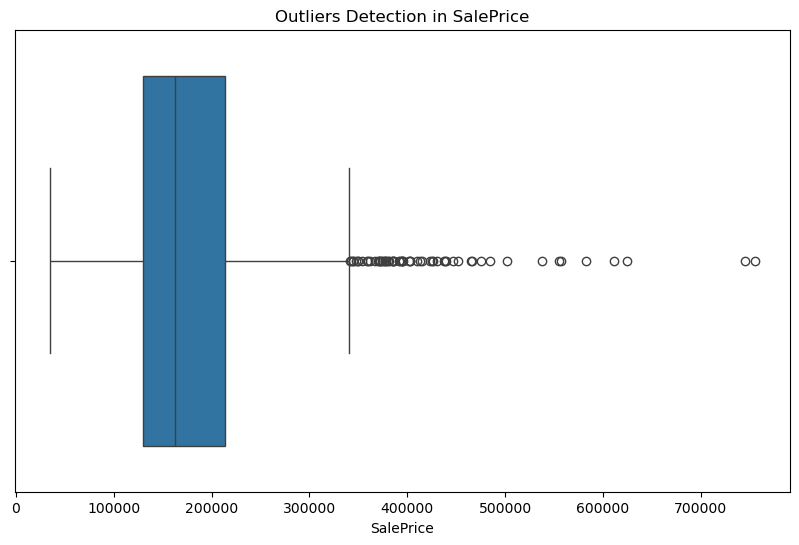

In [93]:
# Box plot for SalePrice to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['SalePrice'])
plt.title("Outliers Detection in SalePrice")
plt.show()


In [95]:
# Remove outliers by filtering out values greater than the 99th percentile
percentile_99 = train_df['SalePrice'].quantile(0.99)
train_df_no_outliers = train_df[train_df['SalePrice'] <= percentile_99]

# Check the shape of the dataset after removing outliers
print(f"Original dataset shape: {train_df.shape}")
print(f"Dataset shape after removing outliers: {train_df_no_outliers.shape}")


Original dataset shape: (1460, 81)
Dataset shape after removing outliers: (1445, 81)


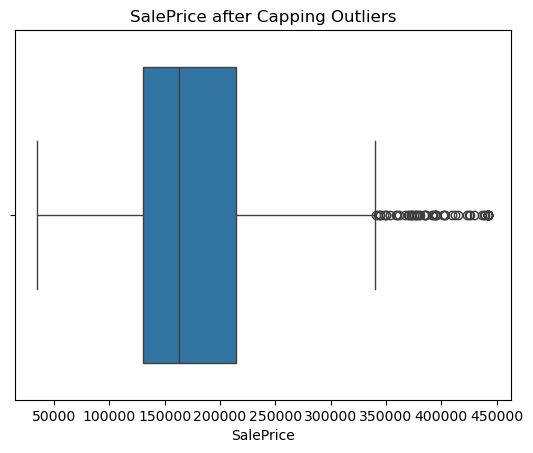

In [97]:
# Cap the outliers by setting them to the 99th percentile
train_df['SalePrice'] = train_df['SalePrice'].clip(upper=percentile_99)

# Check the distribution again
sns.boxplot(x=train_df['SalePrice'])
plt.title("SalePrice after Capping Outliers")
plt.show()


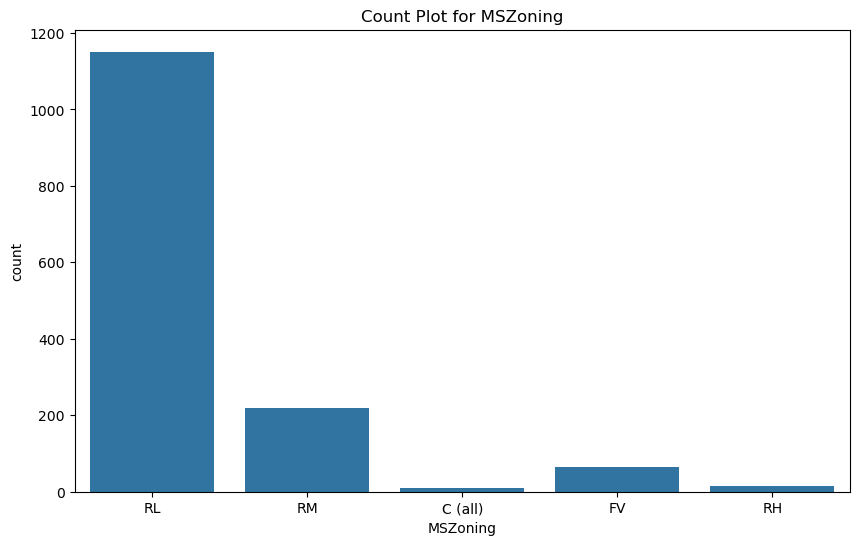

In [99]:
# Count plot for MSZoning
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='MSZoning')
plt.title("Count Plot for MSZoning")
plt.show()

# Repeat for other categorical variables (e.g., Street, FireplaceQu, etc.)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Output evaluation metrics for Random Forest
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R²: {r2_rf}")


Random Forest - MAE: 17716.991164383562
Random Forest - MSE: 844998924.7282932
Random Forest - RMSE: 29068.86521225576
Random Forest - R²: 0.8898353339996771


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the Feedforward Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer (for regression)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Predict with the neural network
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

# Output evaluation metrics for Neural Network
print(f"Neural Network - MAE: {mae_nn}")
print(f"Neural Network - MSE: {mse_nn}")
print(f"Neural Network - RMSE: {rmse_nn}")
print(f"Neural Network - R²: {r2_nn}")


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Neural Network - MAE: 41914.04790841717
Neural Network - MSE: 2960105068.194305
Neural Network - RMSE: 54406.84762228285
Neural Network - R²: 0.61408354896032


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Output evaluation metrics for Gradient Boosting
print(f"Gradient Boosting - MAE: {mae_gb}")
print(f"Gradient Boosting - MSE: {mse_gb}")
print(f"Gradient Boosting - RMSE: {rmse_gb}")
print(f"Gradient Boosting - R²: {r2_gb}")


Gradient Boosting - MAE: 17557.57347832969
Gradient Boosting - MSE: 828999251.3927996
Gradient Boosting - RMSE: 28792.347097671623
Gradient Boosting - R²: 0.8919212522387869


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
import pandas as pd

# Store the results in a DataFrame for easy comparison
results = pd.DataFrame({
    'Model': ['Random Forest', 'Feedforward Neural Network', 'Gradient Boosting'],
    'MAE': [mae_rf, mae_nn, mae_gb],
    'MSE': [mse_rf, mse_nn, mse_gb],
    'RMSE': [rmse_rf, rmse_nn, rmse_gb],
    'R²': [r2_rf, r2_nn, r2_gb]
})

# Display the comparison results
print(results)


                        Model           MAE           MSE          RMSE  \
0               Random Forest  17716.991164  8.449989e+08  29068.865212   
1  Feedforward Neural Network  41914.047908  2.960105e+09  54406.847622   
2           Gradient Boosting  17557.573478  8.289993e+08  28792.347098   

         R²  
0  0.889835  
1  0.614084  
2  0.891921  


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Score (MSE):", grid_search_rf.best_score_)
 
# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Output evaluation metrics for Random Forest (tuned)
print(f"Random Forest (Tuned) - MAE: {mae_rf_tuned}")
print(f"Random Forest (Tuned) - MSE: {mse_rf_tuned}")
print(f"Random Forest (Tuned) - RMSE: {rmse_rf_tuned}")
print(f"Random Forest (Tuned) - R²: {r2_rf_tuned}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (MSE): -953910101.9605677
Random Forest (Tuned) - MAE: 17822.95132645541
Random Forest (Tuned) - MSE: 846771366.2929217
Random Forest (Tuned) - RMSE: 29099.33618302867
Random Forest (Tuned) - R²: 0.8896042562701579


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=512, step=64), activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='mean_squared_error')
    
    return model

# Set up the tuner
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, factor=3, directory='tuning', project_name='house_price_nn')

# Perform the search
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Make predictions with the tuned model
y_pred_nn_tuned = best_model.predict(X_test_scaled).ravel()

# Evaluate the tuned model
mae_nn_tuned = mean_absolute_error(y_test, y_pred_nn_tuned)
mse_nn_tuned = mean_squared_error(y_test, y_pred_nn_tuned)
rmse_nn_tuned = mean_squared_error(y_test, y_pred_nn_tuned, squared=False)
r2_nn_tuned = r2_score(y_test, y_pred_nn_tuned)

print(f"Neural Network (Tuned) - MAE: {mae_nn_tuned}")
print(f"Neural Network (Tuned) - MSE: {mse_nn_tuned}")
print(f"Neural Network (Tuned) - RMSE: {rmse_nn_tuned}")
print(f"Neural Network (Tuned) - R²: {r2_nn_tuned}")


Trial 30 Complete [00h 00m 05s]
val_loss: 39528087552.0

Best val_loss So Far: 1725014912.0
Total elapsed time: 00h 01m 56s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       125,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,121 (1.48 MB)

 Trainable params: 389,121 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Neural Network (Tuned) - MAE: 26572.247679409917
Neural Network (Tuned) - MSE: 1725015030.8096564
Neural Network (Tuned) - RMSE: 41533.300263880505
Neural Network (Tuned) - R²: 0.7751053887130236


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
print("Best Hyperparameters:", grid_search_gb.best_params_)
print("Best Score (MSE):", grid_search_gb.best_score_)

# Best model from grid search
best_gb_model = grid_search_gb.best_estimator_

# Make predictions with the tuned model
y_pred_gb_tuned = best_gb_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
rmse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned, squared=False)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Gradient Boosting (Tuned) - MAE: {mae_gb_tuned}")
print(f"Gradient Boosting (Tuned) - MSE: {mse_gb_tuned}")
print(f"Gradient Boosting (Tuned) - RMSE: {rmse_gb_tuned}")
print(f"Gradient Boosting (Tuned) - R²: {r2_gb_tuned}")



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score (MSE): -825474320.4450592
Gradient Boosting (Tuned) - MAE: 17096.474904246246
Gradient Boosting (Tuned) - MSE: 818289982.1896918
Gradient Boosting (Tuned) - RMSE: 28605.768337691818
Gradient Boosting (Tuned) - R²: 0.893317446991635


C:\Users\Eileen Lok\Documents\Data Science\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


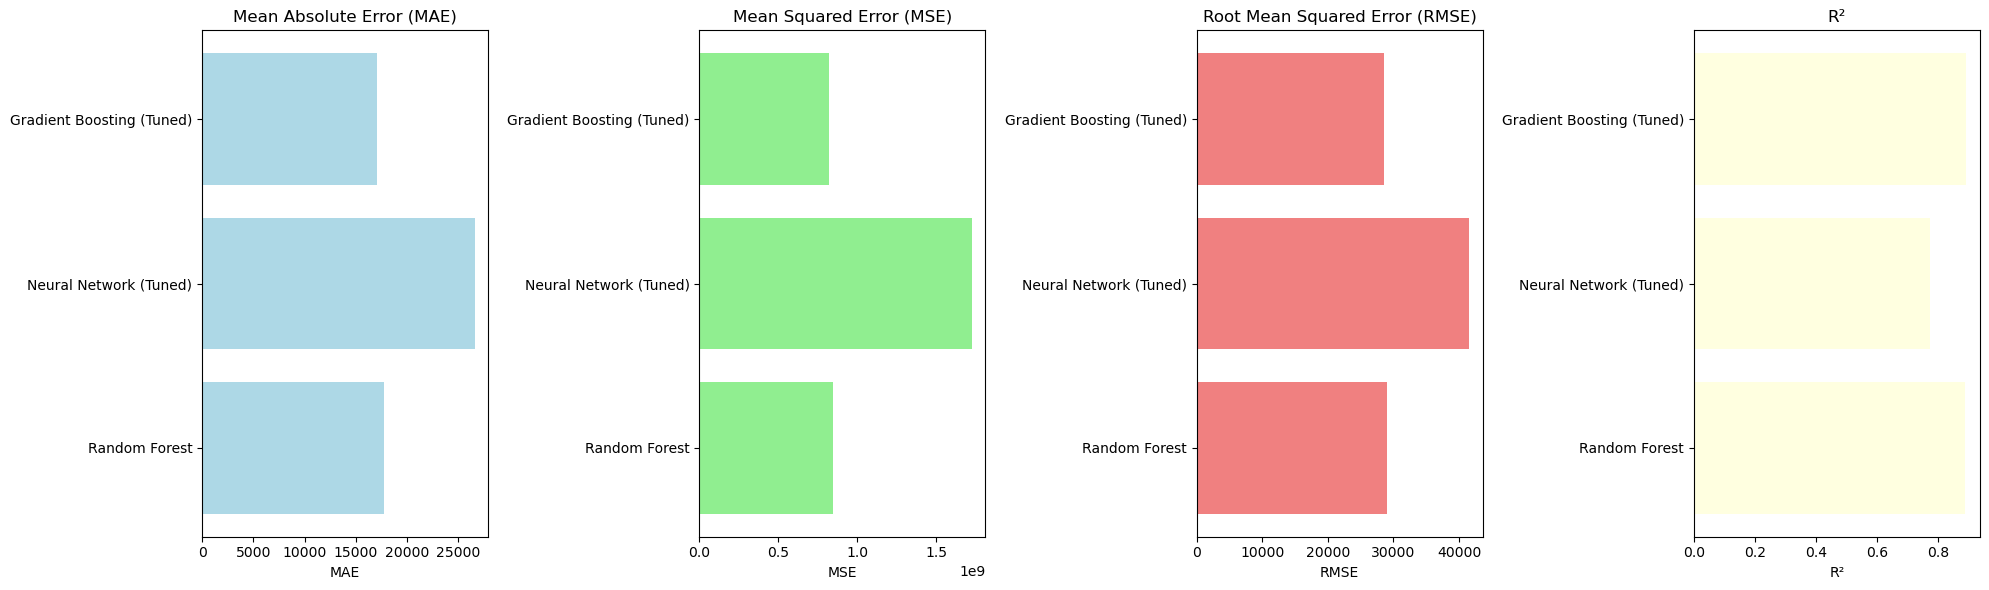

In [109]:
# Visualization of model comparison
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes for the bar plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Bar plot for MAE
axes[0].barh(model_comparison_df['Model'], model_comparison_df['MAE'], color='lightblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('MAE')

# Bar plot for MSE
axes[1].barh(model_comparison_df['Model'], model_comparison_df['MSE'], color='lightgreen')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('MSE')

# Bar plot for RMSE
axes[2].barh(model_comparison_df['Model'], model_comparison_df['RMSE'], color='lightcoral')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('RMSE')

# Bar plot for R²
axes[3].barh(model_comparison_df['Model'], model_comparison_df['R²'], color='lightyellow')
axes[3].set_title('R²')
axes[3].set_xlabel('R²')

# Display all plots
plt.tight_layout()
plt.show()

